---
title: "Decision tree"
format: 
  html:
    code-fold: true
execute: 
  enabled: true
---

## Brief introduction of Decision tree
A decision tree is a powerful and popular machine learning algorithm used for both classification and regression tasks. It is a predictive modeling tool that maps observations about an item to conclusions about the item's target value. The decision tree structure resembles an inverted tree, where each node represents a decision or test on an attribute, each branch represents an outcome of the test, and each leaf node represents a class label or a numerical value.

### Binary classification with decision trees

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### We will be using y="target" (output target) and all other remaining columns as our X (input feature) matrix for binary classification. 
Below is the processing of the data.

In [2]:
data = pd.read_csv('./Data/RoadAccident.csv')
column_datatypes = set()
for column in data.columns:
    column_datatypes.add(str(data[column].dtype))
print("The dataset contains {} different data types and they are: {}".format(len(column_datatypes), ", ".join(column_datatypes)))
X = data.drop(columns='Accident_Severity')
numerical_features = list()
categorical_features = list()
for column in X.columns:
    if (data[column].dtype == 'float64' or data[column].dtype == 'int64'):
        numerical_features.append(column)
    elif (data[column].dtype == 'object'):
        categorical_features.append(column)
y = data['Accident_Severity']
X = X.drop(columns=['Accident_Index','Datetime'])
discrete_features = ['Driver_IMD_Decile','Speed_limit','Year','Season','Month_of_Year','Day_of_Month','Day_of_Week','Number_of_Vehicles','Age_of_Driver']
for item in discrete_features:
    numerical_features.remove(item)
    categorical_features.append(item)
numerical_features.remove('Accident_Index')
categorical_features.remove('Datetime')
categorical_features_index = list()
for i in categorical_features:
    categorical_features_index.append(X.columns.get_loc(i))
    X[i] = LabelEncoder().fit_transform(X[i])
X.head()

The dataset contains 3 different data types and they are: float64, int64, object


,Latitude,Longitude,Region,Urban_or_Rural_Area,X1st_Road_Class,Driver_IMD_Decile,Speed_limit,Road_Type,Road_Surface_Conditions,Weather,...,Age_of_Vehicle,Junction_Detail,Junction_Location,X1st_Point_of_Impact,Driver_Journey_Purpose,Engine_CC,Propulsion_Code,Vehicle_Make,Vehicle_Category,Vehicle_Manoeuvre
0,51.495653,-0.179097,2,1,3,6,1,3,0,0,...,8,2,8,2,2,1781,1,0,1,1
1,51.499635,-0.209915,2,1,0,2,1,3,0,0,...,2,1,7,4,2,2987,0,10,1,10
2,51.492515,-0.168130,2,1,5,4,1,3,0,0,...,11,0,7,2,1,998,1,12,1,1
3,51.504784,-0.193863,2,1,0,1,1,3,0,0,...,5,7,7,4,1,2179,0,2,5,8
4,51.522072,-0.212927,2,1,2,2,1,3,4,0,...,4,7,0,3,1,2198,0,4,5,3


### Show the heat-map for the correlation matrix

(30, 30)


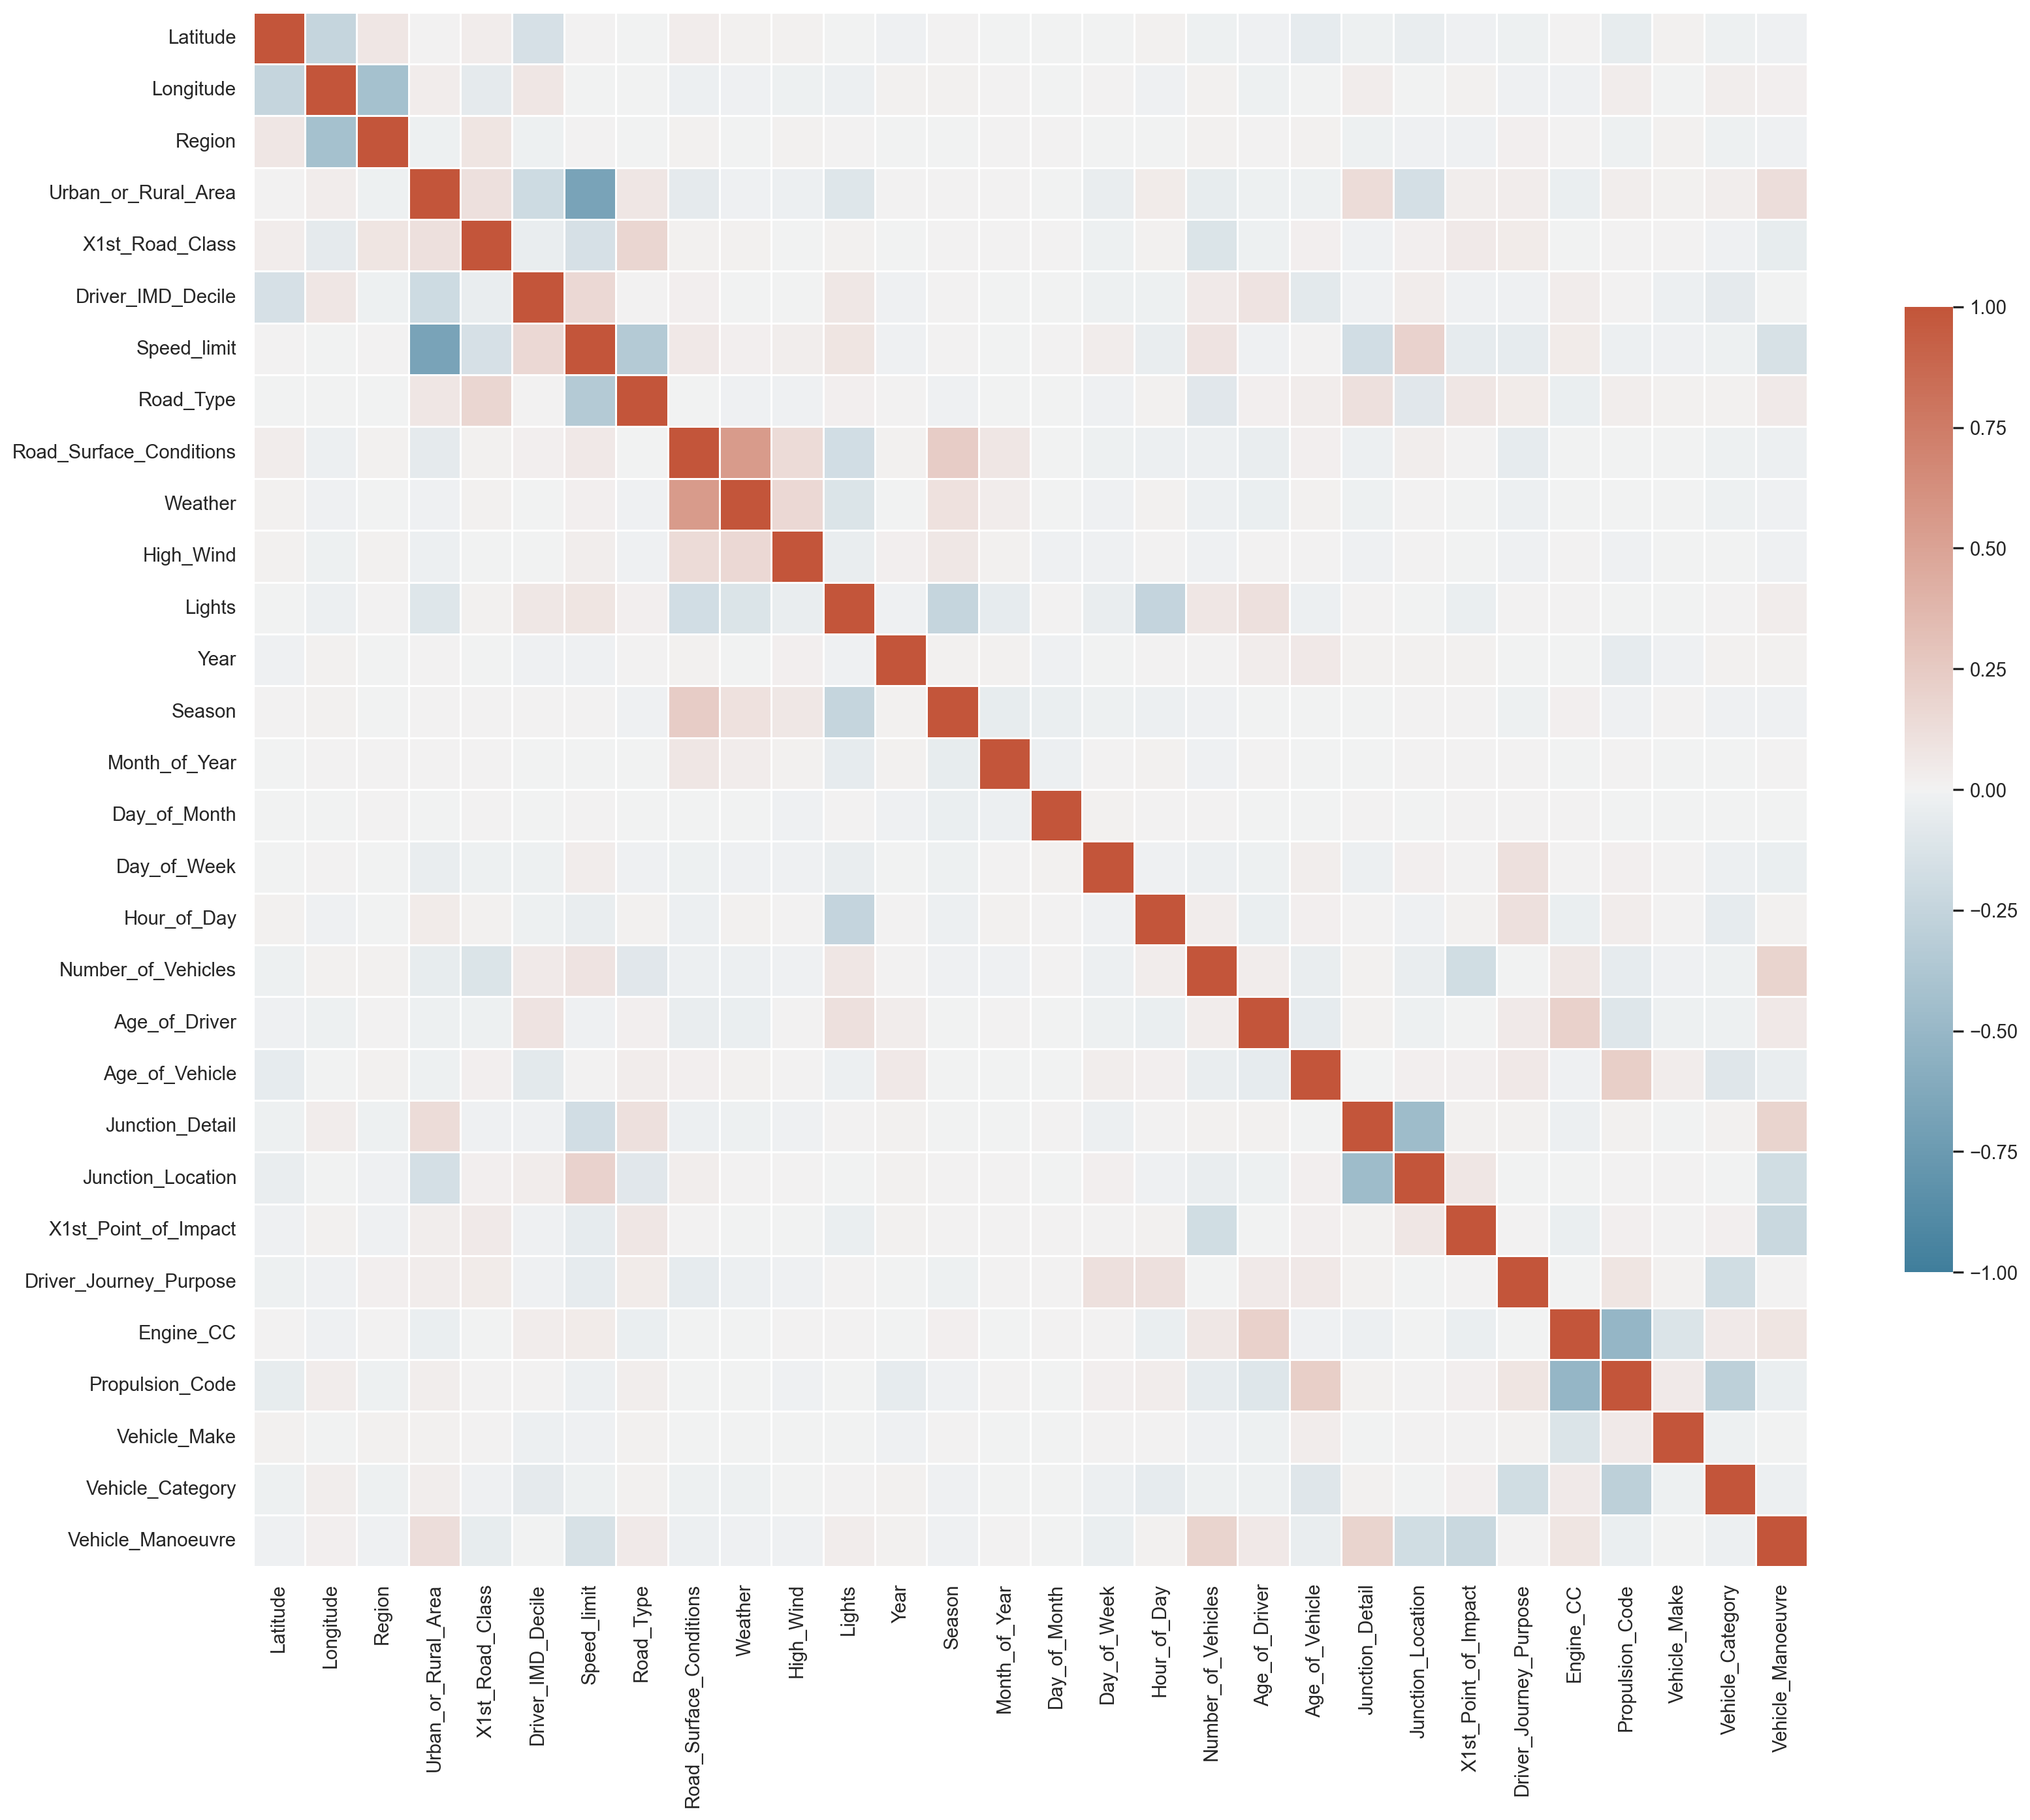

In [3]:
corr = X.corr();  #print(corr)					#COMPUTE CORRELATION OF FEATER MATRIX
print(corr.shape)
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(20, 20))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) 	# Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### Generate a Seaborn pairplot to check any patterns 

### Partition the dataset into training and test sets and train a Sklearn decision tree model

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(x_train,y_train)

### Now fit the trained model both on the training and testing sets

ACCURACY: 1.0


NEGATIVE RECALL (Y=0): 1.0
NEGATIVE PRECISION (Y=0): 1.0


POSITIVE RECALL (Y=1): 1.0
POSITIVE PRECISION (Y=1): 1.0
[[45409     0]
 [    0 15031]]


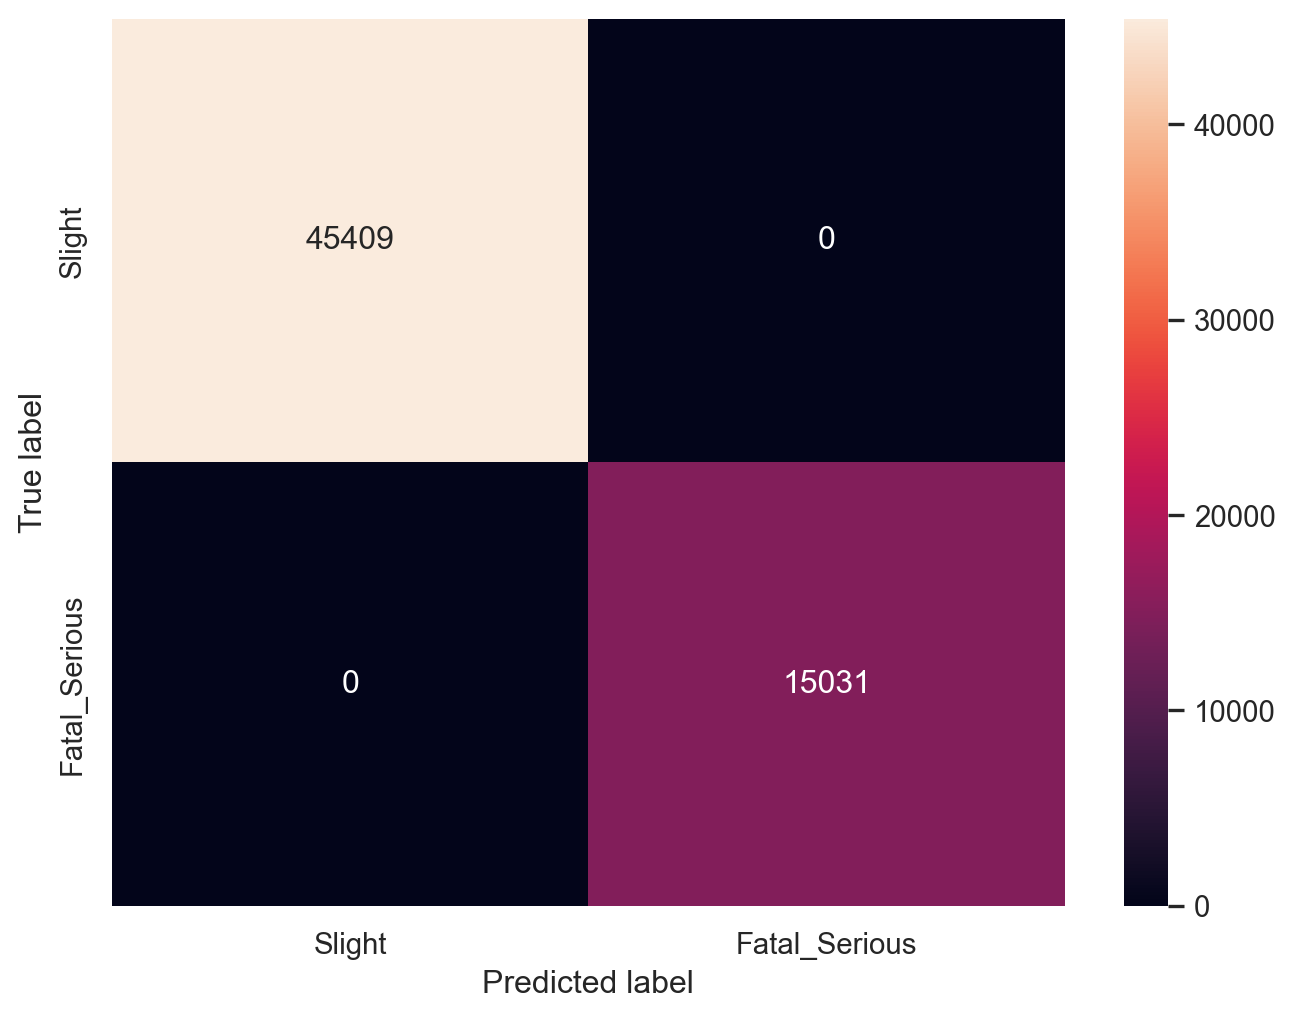

ACCURACY: 0.6616810059563203
NEGATIVE RECALL (Y=0): 0.7669971671388102
NEGATIVE PRECISION (Y=0): 0.7774587221823402
POSITIVE RECALL (Y=1): 0.34976402726796013
POSITIVE PRECISION (Y=1): 0.3363590519415028
[[8664 2632]
 [2480 1334]]


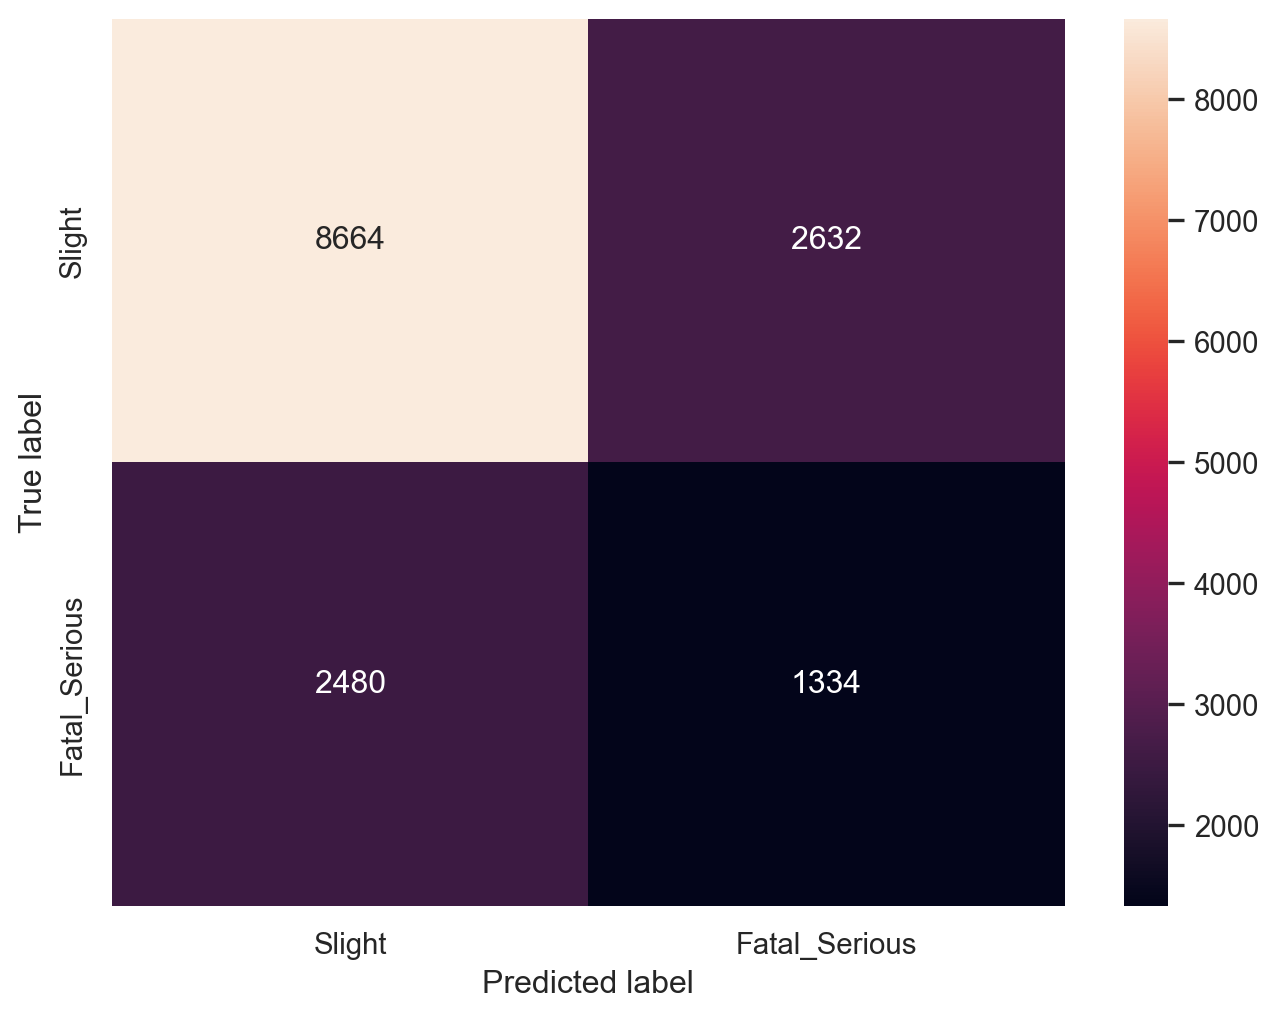

In [5]:
#| code-fold: false
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

def confusion_plot(y_data, y_pred):
    accuracy = metrics.accuracy_score(y_data, y_pred)
    print('ACCURACY:', accuracy)
    pre0 = metrics.precision_score(y_data, y_pred, pos_label='Slight')
    per0 = metrics.recall_score(y_data, y_pred, pos_label='Slight')
    print('NEGATIVE RECALL (Y=0):', per0)
    print('NEGATIVE PRECISION (Y=0):', pre0)
    pre1 = metrics.precision_score(y_data, y_pred, pos_label='Fatal_Serious')
    per1 = metrics.recall_score(y_data, y_pred, pos_label='Fatal_Serious')
    print('POSITIVE RECALL (Y=1):', per1)
    print('POSITIVE PRECISION (Y=1):', pre1)
    matrix = metrics.confusion_matrix(y_data, y_pred, labels=['Slight', 'Fatal_Serious'])
    print(matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt="d", xticklabels=['Slight', 'Fatal_Serious'], yticklabels=['Slight', 'Fatal_Serious'])
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
confusion_plot(y_train,yp_train)
confusion_plot(y_test,yp_test)

### The provided confusion matrix suggests that the trained decision tree model excels in accurately predicting negative cases, demonstrating a high level of proficiency in identifying instances where the outcome is not of significant concern. However, the model appears to struggle when it comes to predicting positive cases, particularly those that are critically serious, indicating a limitation in its ability to capture instances with higher importance or severity.

### Now loop over some possible hyper-parameter values to find the best maximum depth for the decision tree model

In [6]:
test_results=[]
train_results=[]

for num_layer in range(1,20):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(x_train, y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label='Slight'),recall_score(y_test, yp_test,pos_label='Fatal_Serious')])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,pos_label='Slight'),recall_score(y_train, yp_train,pos_label='Fatal_Serious')])

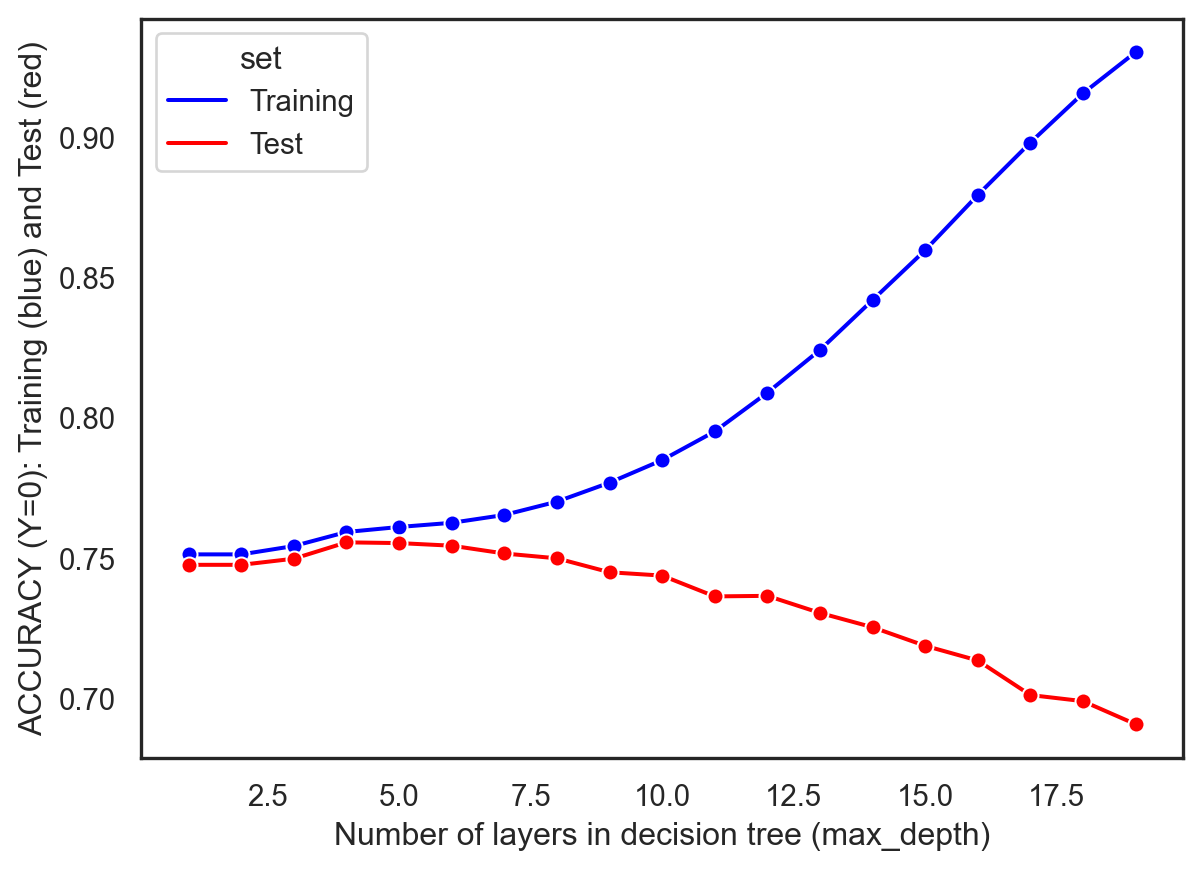

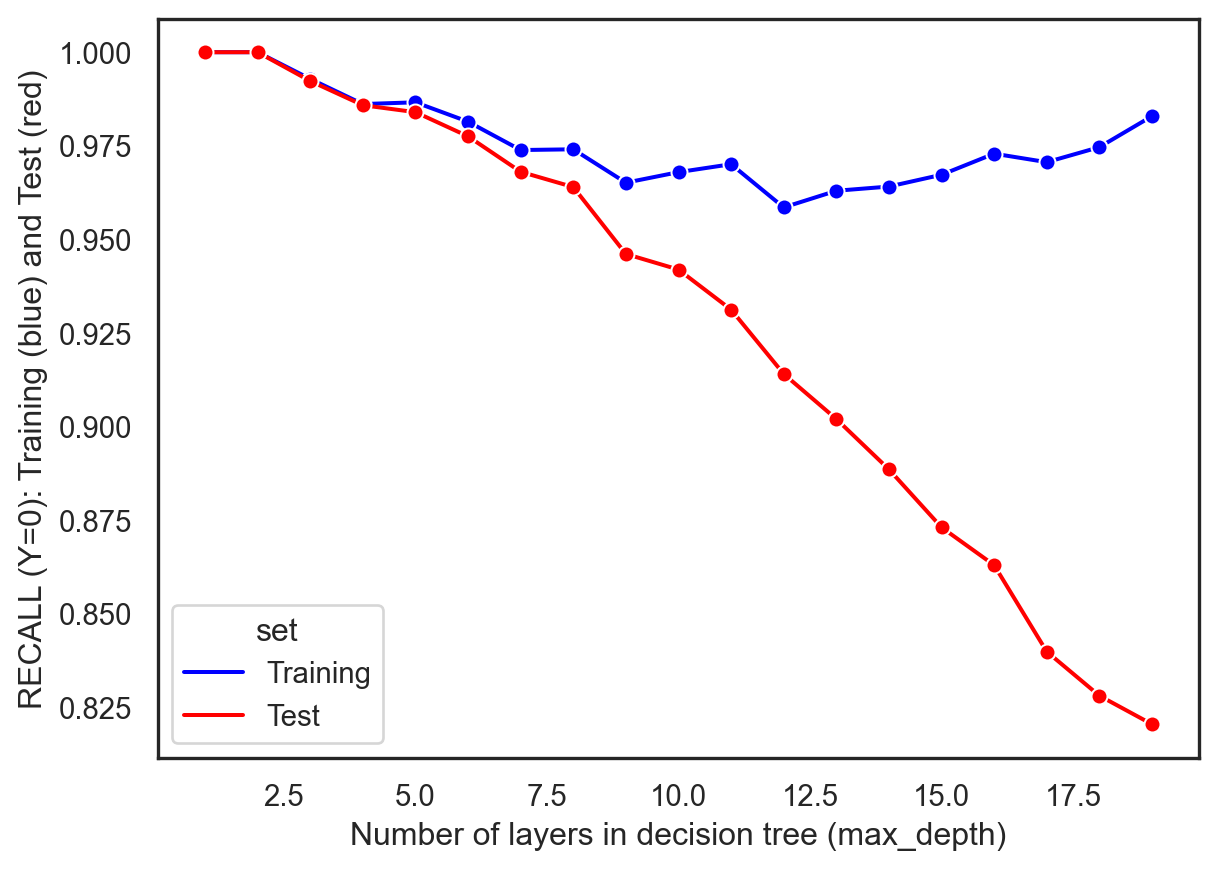

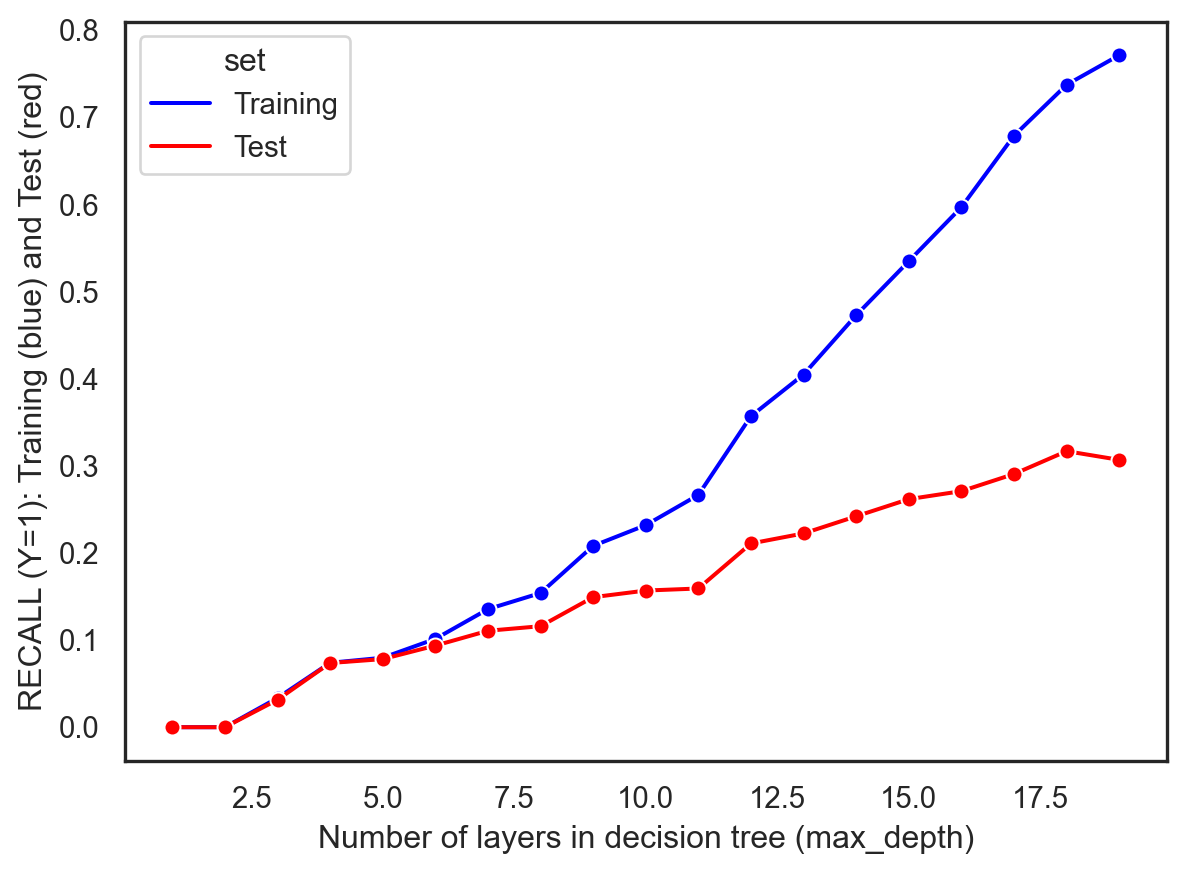

In [7]:
#| code-fold : false
columns = ['num_layer', 'accuracy_score', 'recall_score_0','recall_score_1']
df1 = pd.DataFrame(train_results, columns=columns)
df1['set'] = 'Training'
df2 = pd.DataFrame(test_results, columns=columns)
df2['set'] = 'Test'
final = pd.concat([df1, df2], axis=0)
plot1 = sns.lineplot(x=final['num_layer'], y=final['accuracy_score'], hue = final['set'], palette=['blue', 'red'],marker='o')
plot1.set(xlabel = 'Number of layers in decision tree (max_depth)', ylabel = 'ACCURACY (Y=0): Training (blue) and Test (red)')
plt.show()

plot2 = sns.lineplot(x=final['num_layer'], y=final['recall_score_0'], hue = final['set'], palette=['blue', 'red'],marker='o')
plot2.set(xlabel = 'Number of layers in decision tree (max_depth)', ylabel = 'RECALL (Y=0): Training (blue) and Test (red)')
plt.show()

plot3 = sns.lineplot(x=final['num_layer'], y=final['recall_score_1'], hue = final['set'], palette=['blue', 'red'],marker='o')
plot3.set(xlabel = 'Number of layers in decision tree (max_depth)', ylabel = 'RECALL (Y=1): Training (blue) and Test (red)')
plt.show()

### From the above plots, we can tell the best number of layers in the decision tree might be 17, since the model is performing well at correctly identifying instances of the negative class (True Negatives) but is not as effective at capturing instances of the positive class (True Positives).We should select a value for 'max_depth' that is as large as possible.
Let's check the confusion matrix again.

------TRAINING------
ACCURACY: 0.8978160158835209


NEGATIVE RECALL (Y=0): 0.970754696205598
NEGATIVE PRECISION (Y=0): 0.9009176561957122


POSITIVE RECALL (Y=1): 0.6774665690905463
POSITIVE PRECISION (Y=1): 0.8846320910433498
[[44081  1328]
 [ 4848 10183]]


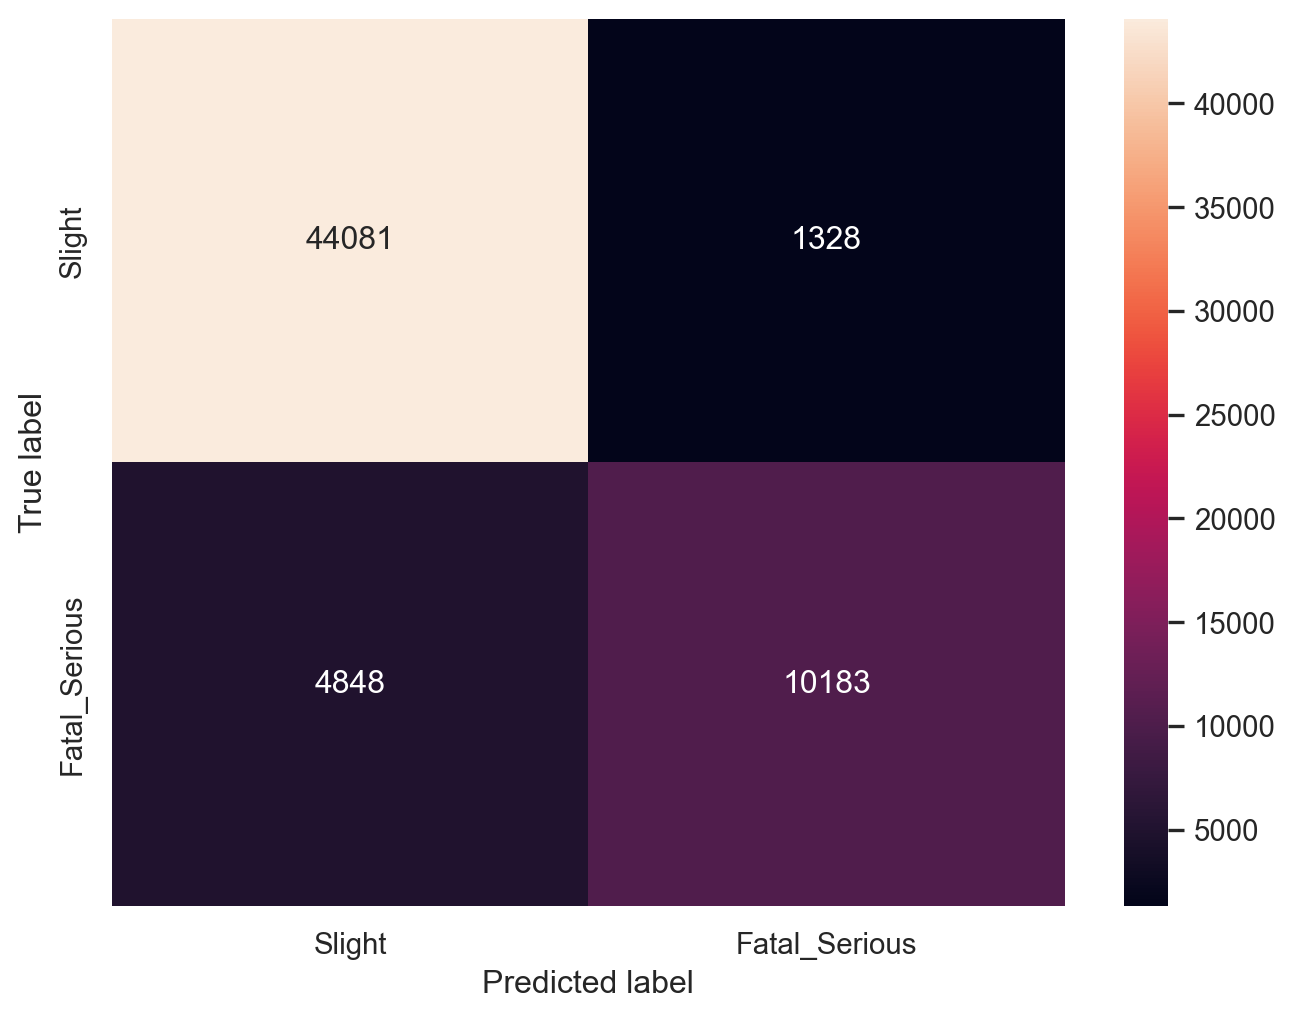

------TEST------
ACCURACY: 0.7028457974851092
NEGATIVE RECALL (Y=0): 0.8415368271954674
NEGATIVE PRECISION (Y=0): 0.778797312796985


POSITIVE RECALL (Y=1): 0.29208180388044047
POSITIVE PRECISION (Y=1): 0.38360881542699726
[[9506 1790]
 [2700 1114]]


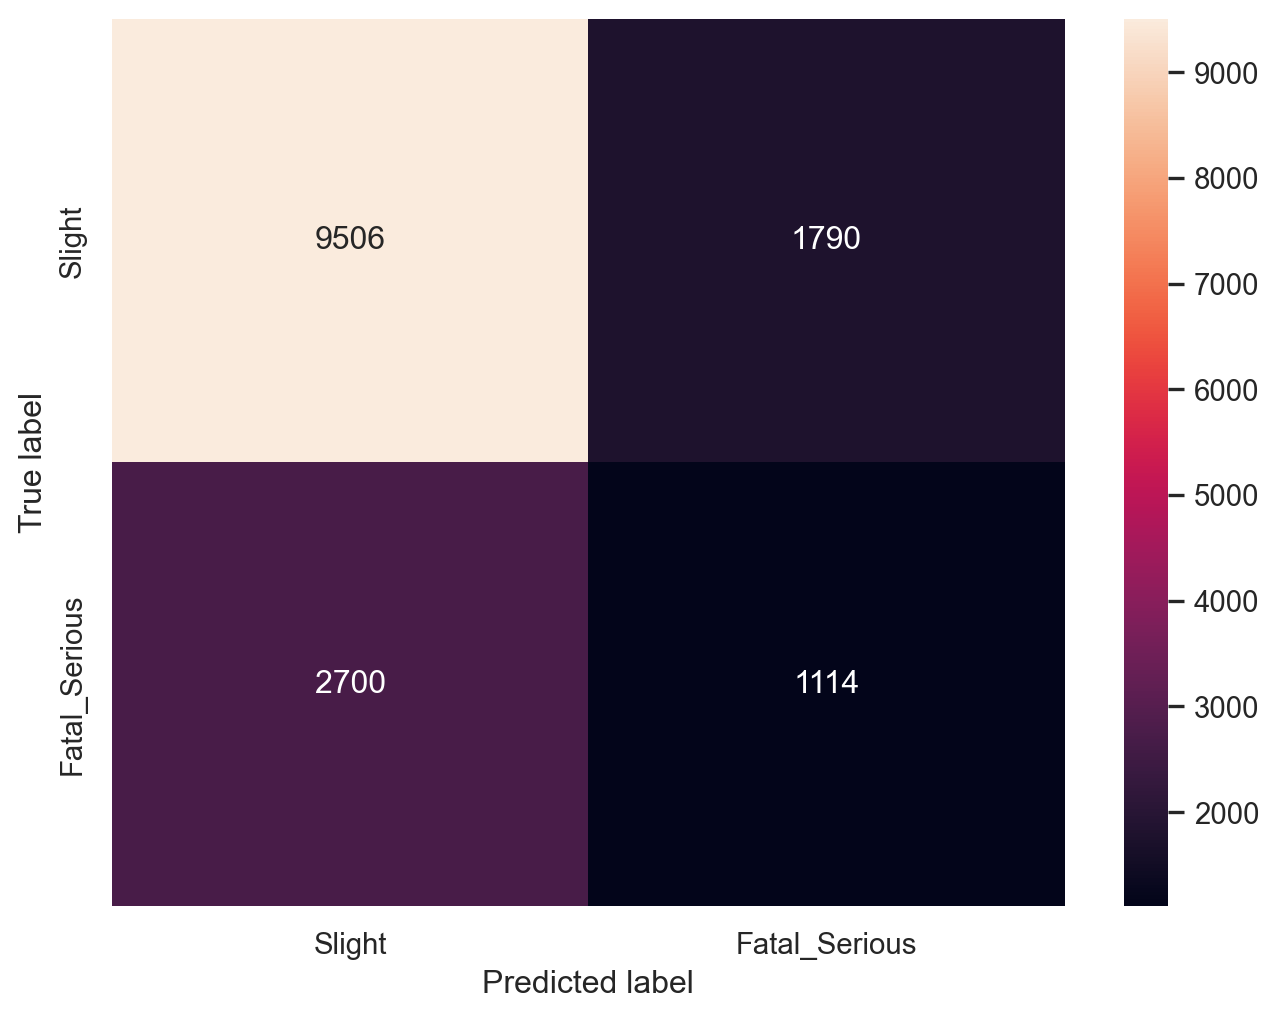

In [8]:
model = tree.DecisionTreeClassifier(max_depth=17)
model = model.fit(x_train,y_train)
yp_train=model.predict(x_train)
yp_test=model.predict(x_test)
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

### Now let's visualize the decision tree. However, since the number of layers is somewhat big and the number of features is large, the visualization might not be informative.

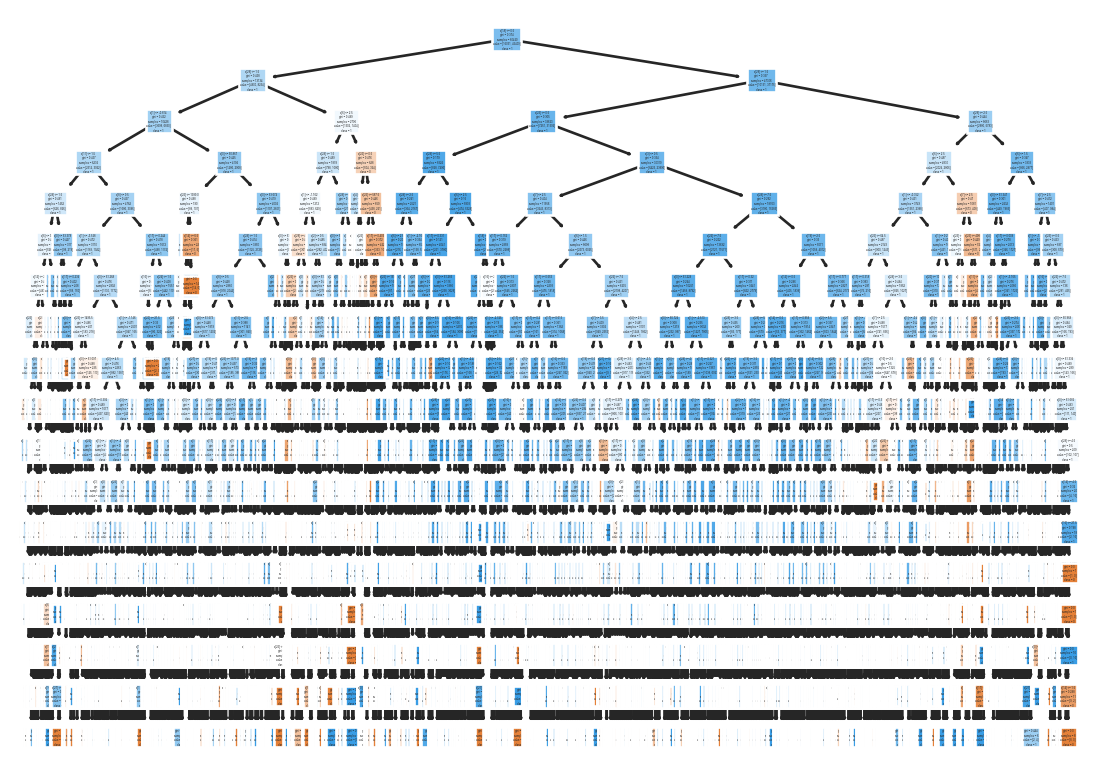

In [9]:
def plot_tree(model,X,Y):
    fitted = model.fit(X,Y)
    _ = tree.plot_tree(fitted,    
                   class_names=['0','1'],
                   filled=True)
    plt.show()
plot_tree(model,x_train,y_train)

## In summary:
Even with a thoughtfully selected number of layers, the decision tree model remains ineffective in capturing instances of the positive class. Hence, we might choose a more complex model such as random forest.

## Use Random Forest Classifier

### We will employ the identical training and testing sets as utilized in the preceding decision tree section for training the random forest classifier.

In [10]:
#| code-fold: false
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

### Check accuracy score for the model 

In [11]:
print('Model accuracy score with 10 decision-trees (default): {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees (default): 0.7621


### Now let's pick a random forest classifier with parameter 'n_estimators' equal to 50 and compute the feature scores

In [12]:
#| code-fold: false
rfc_50 = RandomForestClassifier(n_estimators=50, random_state=0)
rfc_50.fit(x_train, y_train)
y_pred_50 = rfc_50.predict(x_test)

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_50)))
feature_scores = pd.Series(rfc_50.feature_importances_, index=x_train.columns).sort_values(ascending=False)

Model accuracy score with 100 decision-trees : 0.7611


## Let's visualize the feature scores

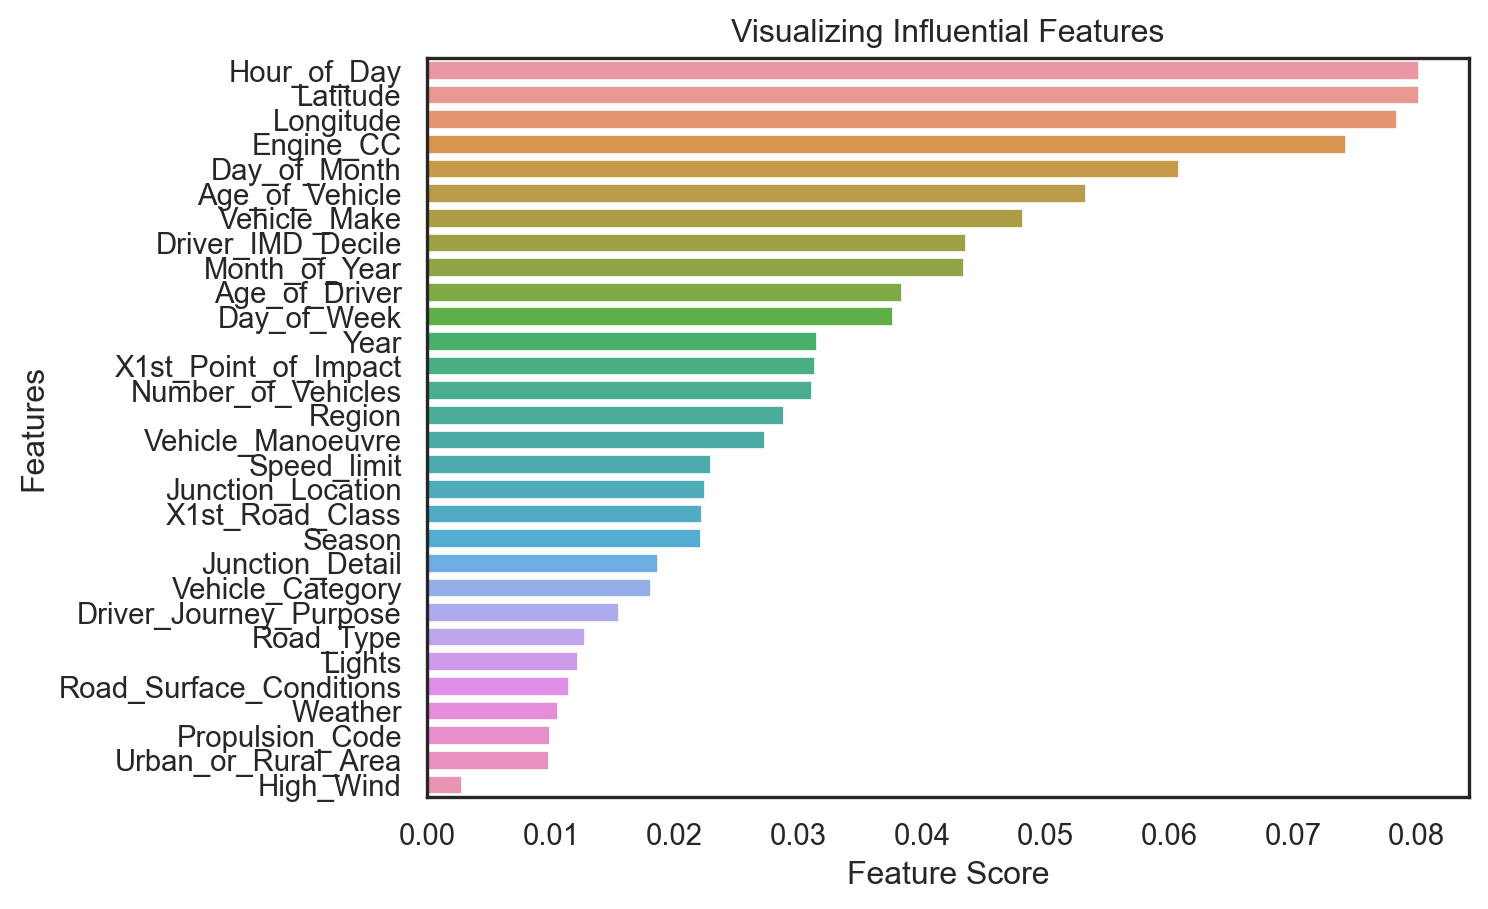

In [13]:
#| code-fold: false
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Score')
plt.ylabel('Features')
plt.title("Visualizing Influential Features")
plt.show()

## In summary:
From the above feature score results, 'Hour_of_Day' is the most influential feature.

### Finally, let's look at the confusion matrix and the classification report 

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[  557  3257]
 [  338 10958]]


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

Fatal_Serious       0.62      0.15      0.24      3814
       Slight       0.77      0.97      0.86     11296

     accuracy                           0.76     15110
    macro avg       0.70      0.56      0.55     15110
 weighted avg       0.73      0.76      0.70     15110



## In conclusion:
Based on the classification reports for both models, the random forest works much better than the decision tree in terms of high predicting accuracy for both positive and negative cases.